# Analyzing baslines

The results are stored in the form of JSON files. Depending on the experiment, different files can
be generated.

* `metrics.json`: Content of the `distributed_metrics` attribute at the end of the FL process
* `distribution.json`: Initial distribution of the clients per dataset
* `clusters.json`: Cluster assignments of the clients per round of FL
* `xeval_{i}.json`: Cross-evaluation matrix at the `i`-th round

To run the experiments, use:
```bash
poetry run python -m trustfids --multirun \
    scenario=<scenario> \
    baseline=trustfids,trustfids_norep,bertoli,bertoli_benign,fedavg,foolsgold
```
Replace `<scenario>` with the name of the scenario you want to run. For example, to run the
baselines on the benign scenario with sampled data, use `scenario=benign_sampled`.

In [12]:
import numpy as np

import matplotlib.pyplot as plt
from trustfids.utils.results import load_results, STYLES, MARKERS, COLORS

In [13]:
# --------------------------------------------------------------------------------------
results = load_results(
    "./benign",
    multirun=True
)
_, metrics, _, _, _ = results[0]
rounds = [r+1 for r in range(len(next(iter(metrics.values()))))]
# --------------------------------------------------------------------------------------

## Scenario analysis

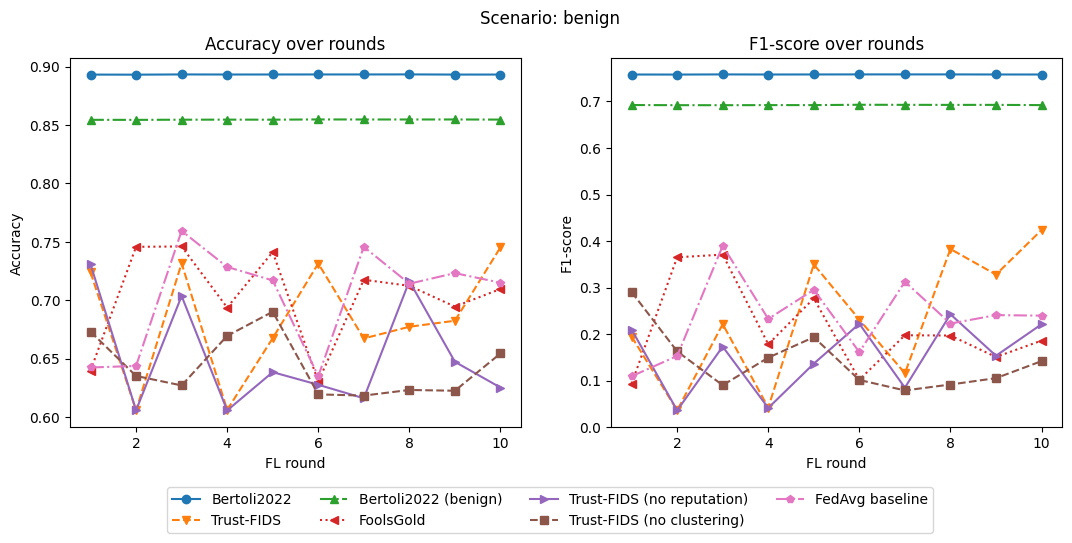

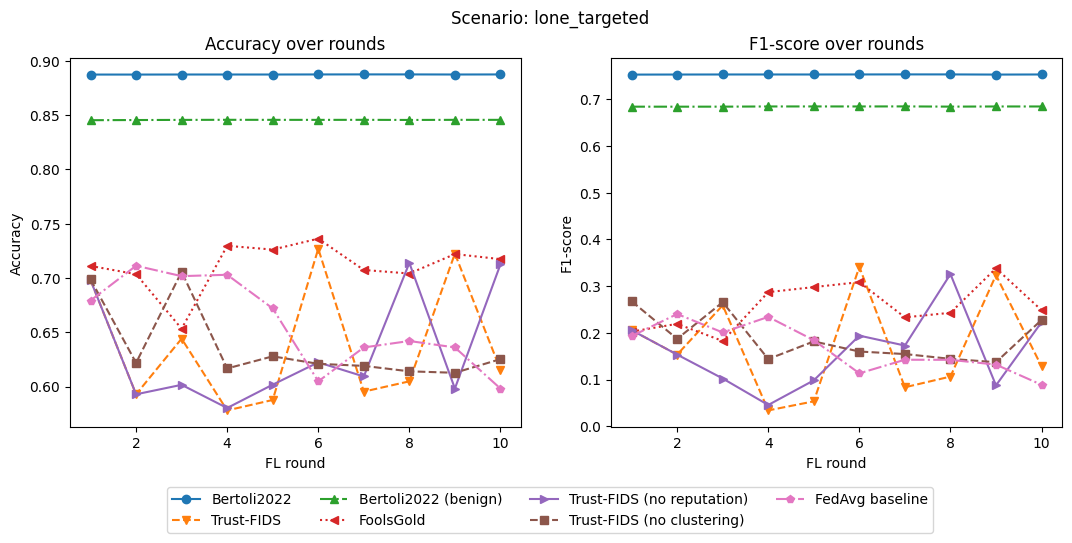

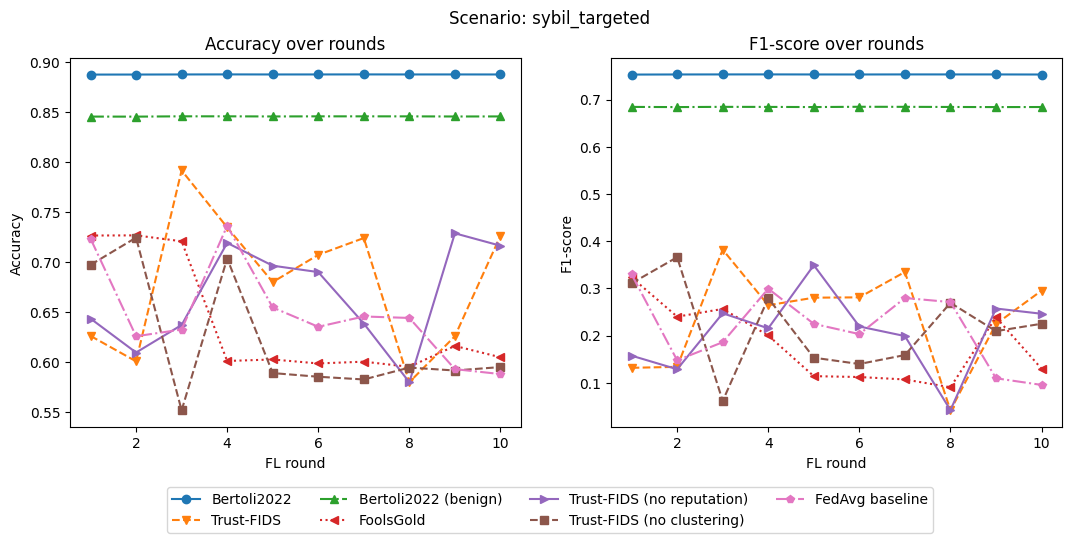

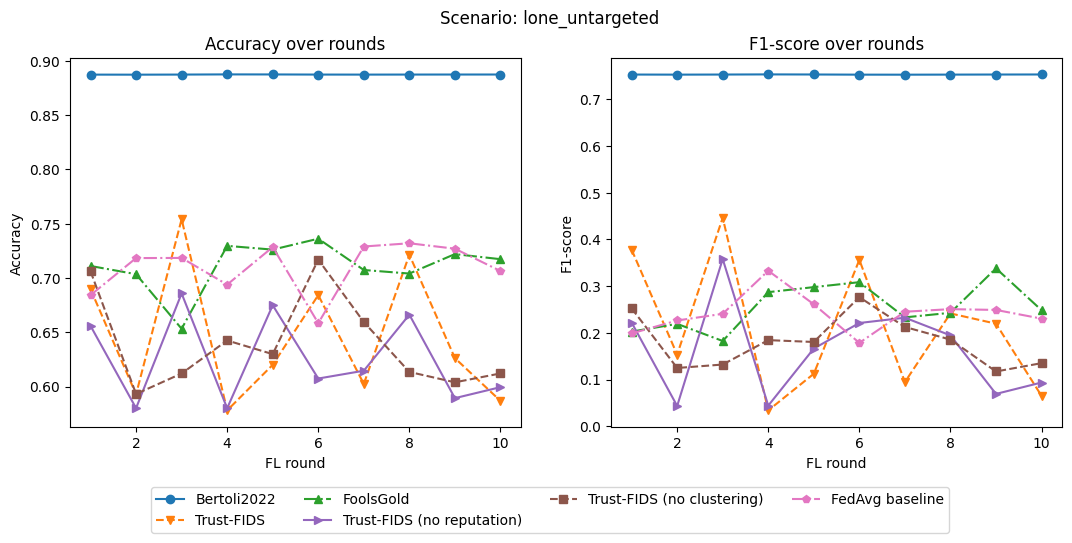

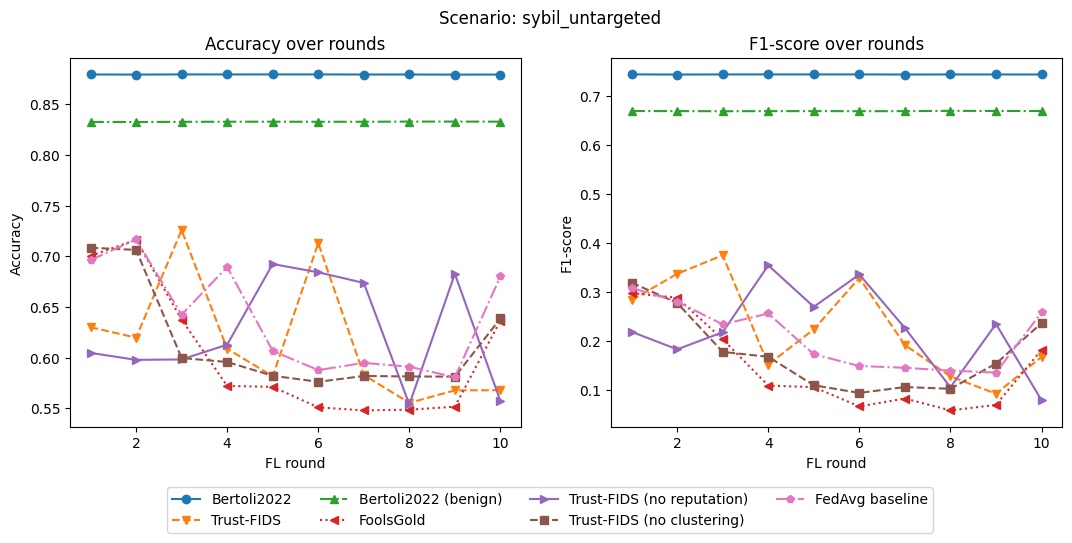

In [14]:
for scenario in ["benign", "lone_targeted", "sybil_targeted", "lone_untargeted", "sybil_untargeted"]:
    
    # --------------------------------------------------------------------------------------
    results = load_results(
        scenario,
        multirun=True
    )
    _, metrics, _, _, _ = results[0]
    rounds = [r+1 for r in range(len(next(iter(metrics.values()))))]
    # --------------------------------------------------------------------------------------

    fig = plt.figure(figsize=(12.8, 4.8))
    fig.suptitle(f"Scenario: {scenario}")
    ax1 = plt.subplot(121)
    plt.title("Accuracy over rounds")
    plt.ylabel("Accuracy")
    plt.xlabel("FL round")
    ax2 = plt.subplot(122)
    plt.title("F1-score over rounds")
    plt.ylabel("F1-score")
    plt.xlabel("FL round")

    labels = []

    for i, run in enumerate(results):
        config, metrics, distribution, clusters, xevals = run

        acc_means = []
        f1_means = []

        if metrics is None:
            continue

        for rnd in range(len(rounds)):
            accs = []
            f1s = []
            for cid, client_metrics in metrics.items():
                if "attacker" in cid:
                    continue
                accs.append(client_metrics[rnd][1]["accuracy"])
                f1s.append(client_metrics[rnd][1]["f1"])

            acc_means.append(np.mean(accs))
            f1_means.append(np.mean(f1s))

        style = STYLES[i % len(STYLES)]
        marker = MARKERS[i % len(MARKERS)]
        color = COLORS[i % len(COLORS)]

        ax1.plot(rounds, acc_means, linestyle=style, marker=marker, color=color)

        ax2.plot(rounds, f1_means, linestyle=style, marker=marker, color=color)

        labels.append(
            f"{config.baseline.name}"
        )

    fig.legend(labels, loc="upper center", bbox_to_anchor=(0.5, 0), ncol=4)
    

plt.show()